In [10]:
import pandas as pd 
import numpy as np 


import plotly.express as px

In [6]:
# generate the dataset for applying the PCA.

In [14]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 30

# Generate features
feature1 = np.random.normal(loc=0, scale=1, size=n_samples)
feature2 = np.random.normal(loc=5, scale=2, size=n_samples)
feature3 = np.random.uniform(low=-3, high=3, size=n_samples)

# Generate binary target (0 and 1)
target = np.random.choice([0, 1], size=n_samples)

# Create DataFrame
df = pd.DataFrame({
    "feature1": feature1,
    "feature2": feature2,
    "feature3": feature3,
    "target": target
})

# Display first 5 rows
df.head()

,feature1,feature2,feature3,target
0,0.496714,3.796587,-1.014612,1
1,-0.138264,8.704556,-2.618650,1
2,0.647689,4.973006,-1.134106,0
3,1.523030,2.884578,-1.048900,1
4,-0.234153,6.645090,1.377637,0


In [15]:
# plot that features in 3D.

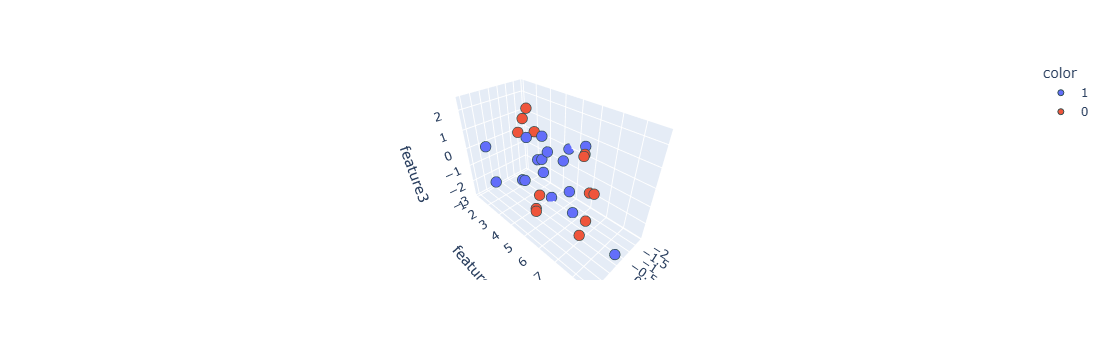

In [17]:

#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [18]:
# now we are applying PCA step by step.

In [19]:
# step 1: Mean center all the values. 

# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [20]:

# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[ 1.03448276  0.10224185  0.15832949]
 [ 0.10224185  1.03448276 -0.12551585]
 [ 0.15832949 -0.12551585  1.03448276]]


In [21]:

# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [22]:
eigen_values

array([0.77568205, 1.19617087, 1.13159535])

In [23]:
eigen_vectors

array([[ 0.58504007, -0.6185458 , -0.5245276 ],
       [-0.52918473,  0.19895562, -0.82485161],
       [-0.61456621, -0.76014325,  0.21092799]])

In [25]:
# find the best two PC from the eigen vector array.
pcs = eigen_vectors[ : , 1 : ]

In [26]:
pcs

array([[-0.6185458 , -0.5245276 ],
       [ 0.19895562, -0.82485161],
       [-0.76014325,  0.21092799]])

In [27]:

transformed_df = np.dot(df.iloc[:,0:3],pcs)
# 30,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,-0.302211,-0.050939,1
1,1.450956,-2.100985,1
2,-0.222102,-0.686467,0
3,-1.102140,-0.253034,1
4,-0.639080,-0.579870,0


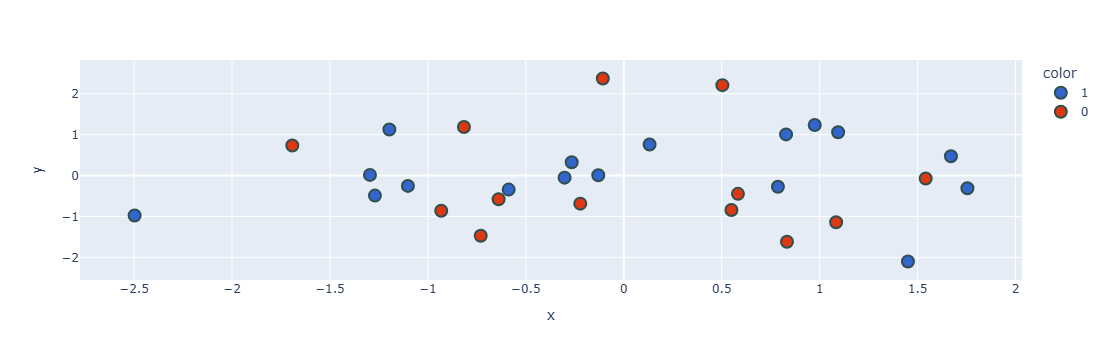

In [28]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()